# Project Analysis | NCAA College Football
### Emily Nell, Chaitanya Patel, Emily Sanders
---

In [137]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import chi2_contingency
from scipy.stats import pearsonr
from scipy.stats import ttest_ind
from scipy.stats import bartlett
from sklearn.linear_model import LinearRegression

In [101]:
football_df = pd.read_csv('merged_college_football_data.csv')
football_df

,Offensive Rank,G,W-L,Total Offense YPG,Season,Defensive Rank,Total Defense YPG,Rushing Rank,Rush YPG,Rushing Defensive Rank,Opp Rush YPG,Passing Rank,Pass YPG,Conference,Teams,Win %,MOV,ATS +/-
0,124,12,5-7,313.8,2024,40,341.9,10,224.0,74,153.4,132,89.8,Mountain West,Air Force,41.7,-4.3,-1.8
1,112,12,4-8,332.8,2024,108,414.4,121,100.3,104,183.3,59,232.4,MAC,Akron,33.3,-11.6,-0.4
2,42,13,9-4,410.2,2024,21,320.1,47,173.8,48,137.8,56,236.4,SEC,Alabama,69.2,16.4,-1.2
3,33,11,5-6,426.8,2024,104,412.5,77,153.8,117,197.6,19,273.0,Sun Belt,App State,45.5,-6.3,-6.9
4,96,12,4-8,354.5,2024,105,413.0,119,106.6,98,174.0,42,247.9,Big 12,Arizona,33.3,-10.0,-13.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,93,12,5-7,360.9,2024,101,408.3,94,131.9,58,145.3,64,229.0,ACC,Virginia,41.7,-6.1,-2.9
95,84,12,4-8,370.7,2024,117,435.0,97,130.6,80,157.2,49,240.1,ACC,Wake Forest,33.3,-6.8,-2.7
96,61,13,6-7,390.5,2024,28,328.4,100,128.8,87,161.8,32,261.7,Big Ten,Washington,46.2,-0.4,-3.5
97,99,12,5-7,350.3,2024,41,342.7,78,153.7,91,165.0,102,196.7,Big Ten,Wisconsin,41.7,-0.5,-1.3


---
# Univariate Analysis
Analyzed count, mean, std, min, max, Q25, Q50, Q75 from 'Total Offense YPG', 'Total Defense YPG', 'MOV', and 'Win %'

In [102]:
# Total Offense YPG stats
print(football_df['Total Offense YPG'].describe())

count     99.000000
mean     384.368687
std       51.609641
min      233.300000
25%      348.950000
50%      386.900000
75%      423.500000
max      488.800000
Name: Total Offense YPG, dtype: float64


In [103]:
# Total Defense YPG stats
print(football_df['Total Defense YPG'].describe())

count     99.000000
mean     372.517172
std       52.676196
min      254.600000
25%      335.950000
50%      368.900000
75%      404.100000
max      516.000000
Name: Total Defense YPG, dtype: float64


In [104]:
# MOV stats
print(football_df['MOV'].describe())

count    99.000000
mean      1.470707
std      10.122134
min     -30.200000
25%      -6.200000
50%       2.500000
75%       8.350000
max      25.700000
Name: MOV, dtype: float64


In [105]:
# Win % stats
print(football_df['Win %'].describe())

count    99.000000
mean     52.438384
std      20.840320
min       0.000000
25%      33.300000
50%      53.900000
75%      69.200000
max      92.900000
Name: Win %, dtype: float64


---
# Bivariate Analysis
- Correlation Matrix for Win %, Total Offense YPG, Total Defense YPG, and MOV
- Heat Map showing Correlation Matrix

In [106]:
correlation_matrix = football_df[['Win %', 'Total Offense YPG', 'Total Defense YPG', 'MOV']].corr()
correlation_matrix

,Win %,Total Offense YPG,Total Defense YPG,MOV
Win %,1.000000,0.522002,-0.601266,0.897535
Total Offense YPG,0.522002,1.000000,-0.077544,0.583890
Total Defense YPG,-0.601266,-0.077544,1.000000,-0.734211
MOV,0.897535,0.583890,-0.734211,1.000000


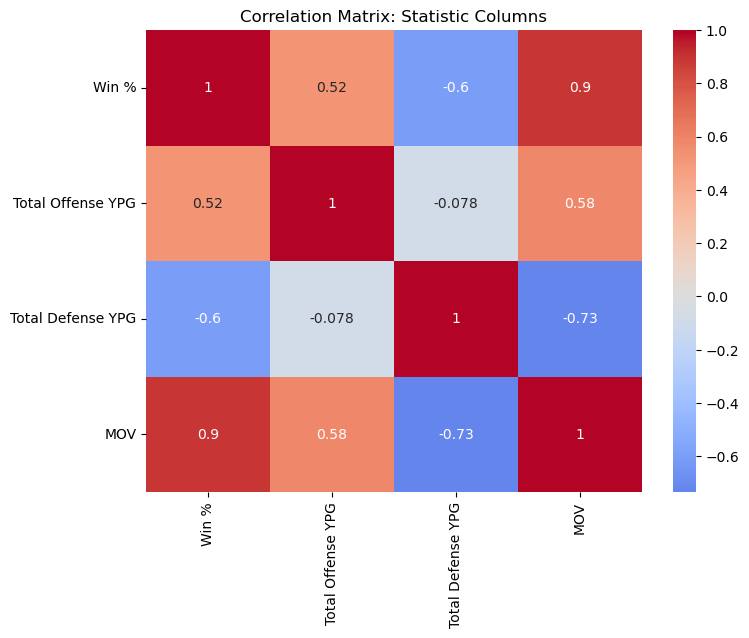

In [107]:
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix: Statistic Columns')
plt.show()

In [108]:
correlation_matrix2 = football_df[['Win %', 'Offensive Rank', 'Defensive Rank', 'Rushing Rank', 'Passing Rank', 'MOV']].corr()
correlation_matrix2

,Win %,Offensive Rank,Defensive Rank,Rushing Rank,Passing Rank,MOV
Win %,1.000000,-0.519020,-0.589691,-0.424531,-0.205222,0.897535
Offensive Rank,-0.519020,1.000000,0.076779,0.564452,0.578564,-0.575832
Defensive Rank,-0.589691,0.076779,1.000000,0.209470,-0.101283,-0.709246
Rushing Rank,-0.424531,0.564452,0.209470,1.000000,-0.274801,-0.529481
Passing Rank,-0.205222,0.578564,-0.101283,-0.274801,1.000000,-0.183779
MOV,0.897535,-0.575832,-0.709246,-0.529481,-0.183779,1.000000


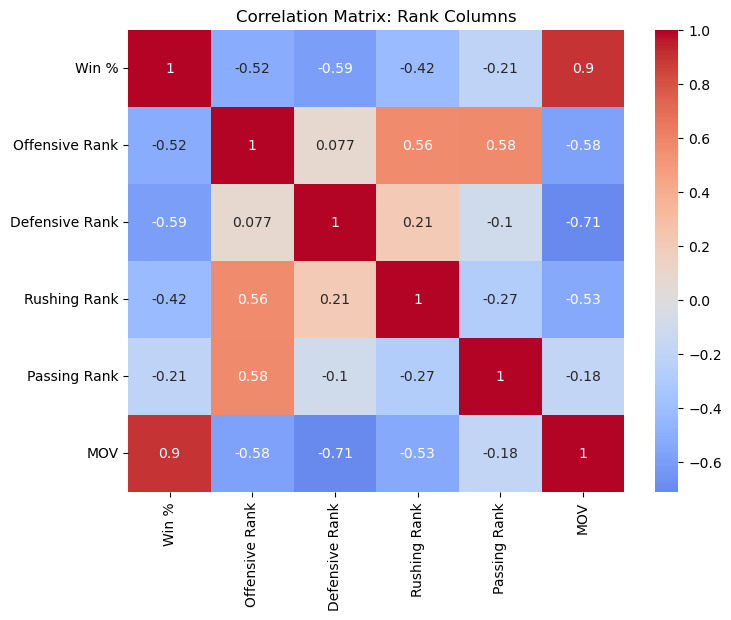

In [109]:
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix2, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix: Rank Columns')
plt.show()

---
# Hypothesis Test
- Pearson's Correlation Test
- T-Test among different variables
- Two Sample T-Test on MOV (balanced v. unbalanced)

In [110]:
# calculate Pearson correlation between 'Win %' and 'Total Offense YPG'
pearson_corr = football_df["Win %"].corr(football_df["Total Offense YPG"], method="pearson")

# display the result
print(f"Pearson Correlation: {pearson_corr:.4f}")

# interpretation
if abs(pearson_corr) < 0.3:
    print("Interpretation: No or weak linear correlation.")
elif 0.3 <= abs(pearson_corr) < 0.7:
    print("Interpretation: Moderate linear correlation.")
else:
    print("Interpretation: Strong linear correlation.")


Pearson Correlation: 0.5220
Interpretation: Moderate linear correlation.


In [111]:
# calculate Pearson correlation between 'Win %' and 'Total Defense YPG'
pearson_corr = football_df["Win %"].corr(football_df["Total Defense YPG"], method="pearson")

# display the result
print(f"Pearson Correlation: {pearson_corr:.4f}")

# interpretation
if abs(pearson_corr) < 0.3:
    print("Interpretation: No or weak linear correlation.")
elif 0.3 <= abs(pearson_corr) < 0.7:
    print("Interpretation: Moderate linear correlation.")
else:
    print("Interpretation: Strong linear correlation.")

Pearson Correlation: -0.6013
Interpretation: Moderate linear correlation.


In [112]:
# calculate Pearson correlation between 'Win %' and 'MOV'
pearson_corr = football_df["Win %"].corr(football_df["MOV"], method="pearson")

# display the result
print(f"Pearson Correlation: {pearson_corr:.4f}")

# interpretation
if abs(pearson_corr) < 0.3:
    print("Interpretation: No or weak linear correlation.")
elif 0.3 <= abs(pearson_corr) < 0.7:
    print("Interpretation: Moderate linear correlation.")
else:
    print("Interpretation: Strong linear correlation.")

Pearson Correlation: 0.8975
Interpretation: Strong linear correlation.


In [113]:
# perform Welch's t-test (default for unequal variances) for 'Total Defense YPG' and 'Total Offense YPG'
t_stat, p_value = ttest_ind(football_df["Total Defense YPG"], football_df['Total Offense YPG'], equal_var=False)

# display the results
print(f"T-Statistic: {t_stat:.4f}")
print(f"P-Value: {p_value:.4f}")

# interpretation
alpha = 0.0
if p_value < alpha:
    print("Reject H0")
else:
    print("Fail to reject H0")

T-Statistic: -1.5990
P-Value: 0.1114
Fail to reject H0


In [114]:
# perform Welch's t-test (default for unequal variances) for 'Offensive Rank' and 'Win %'
t_stat, p_value = ttest_ind(football_df["Offensive Rank"], football_df['Win %'], equal_var=False)

# display the results
print(f"T-Statistic: {t_stat:.4f}")
print(f"P-Value: {p_value:.4f}")

# interpretation
alpha = 0.05
if p_value < alpha:
    print("Reject H0")
else:
    print("Fail to reject H0")

T-Statistic: 3.4225
P-Value: 0.0008
Reject H0


In [115]:
# perform Welch's t-test (default for unequal variances) for 'Defensive Rank' and 'Win %'
t_stat, p_value = ttest_ind(football_df["Defensive Rank"], football_df['Win %'], equal_var=False)

# display the results
print(f"T-Statistic: {t_stat:.4f}")
print(f"P-Value: {p_value:.4f}")

# interpretation
alpha = 0.05
if p_value < alpha:
    print("Reject H0")
else:
    print("Fail to reject H0")

T-Statistic: 3.2830
P-Value: 0.0013
Reject H0


In [135]:
# Assign balance status based on MOV being positive (balanced) or negative (unbalanced)
football_df['MOV_Balance_Status'] = football_df['MOV'].apply(lambda x: 'Balanced' if x >= 0 else 'Unbalanced')
football_df['MOV_Balance_Status']

0     Unbalanced
1     Unbalanced
2       Balanced
3     Unbalanced
4     Unbalanced
         ...    
94    Unbalanced
95    Unbalanced
96    Unbalanced
97    Unbalanced
98    Unbalanced
Name: MOV_Balance_Status, Length: 99, dtype: object

C:\Users\nelle\AppData\Local\Temp\ipykernel_22544\3707241035.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='MOV_Balance_Status', data=football_df, palette='coolwarm')


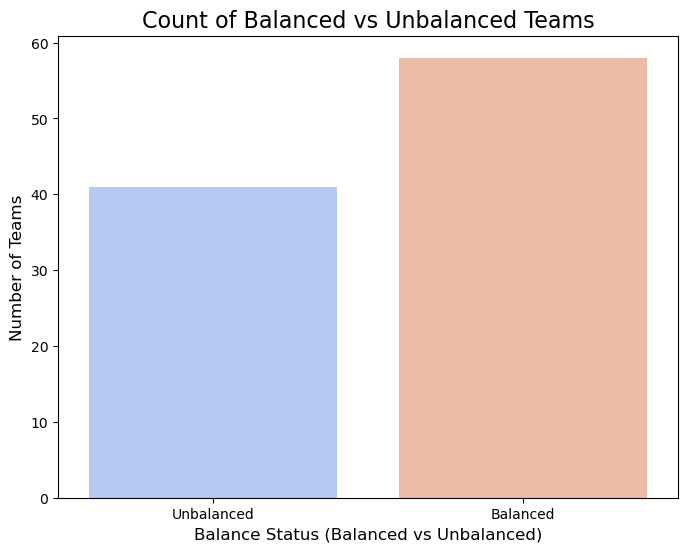

In [132]:
# Count of Balanced vs Unbalanced teams
balance_counts = football_df['MOV_Balance_Status'].value_counts()

# Plot the count of Balanced vs Unbalanced teams
plt.figure(figsize=(8, 6))
sns.countplot(x='MOV_Balance_Status', data=football_df, palette='coolwarm')

plt.xlabel("Balance Status (Balanced vs Unbalanced)", fontsize=12)
plt.ylabel("Number of Teams", fontsize=12)
plt.title("Count of Balanced vs Unbalanced Teams", fontsize=16)

plt.show()

In [133]:
# Perform two-sample t-test
t_stat, p_value = stats.ttest_ind(balanced_MOV, unbalanced_MOV, equal_var=False)

print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")

T-statistic: 13.2753
P-value: 0.0000


---
# Visualizations
- Histogram with the Win % Distribution
- Scatter Plot with Trendline showing the relationship between:
    -  Win % and Total Offense YPG
    -  Win % and Total Defense YPG

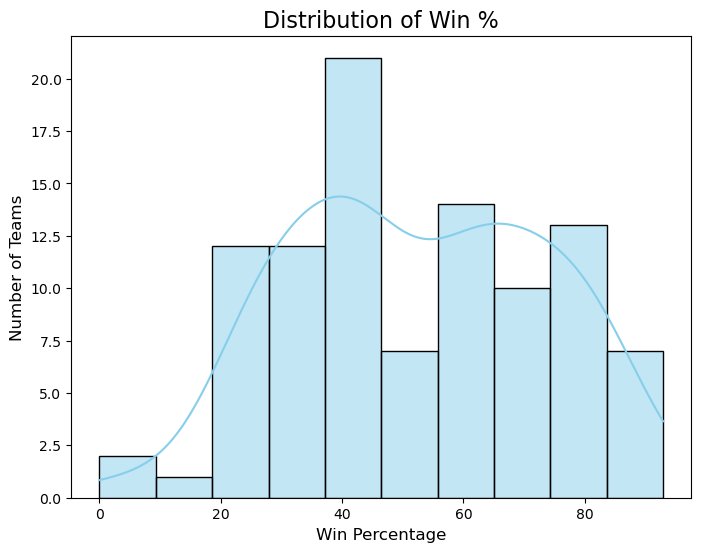

In [159]:
# Histogram of Win %
plt.figure(figsize=(8, 6))
sns.histplot(football_df['Win %'], bins=10, kde=True, color='skyblue')

plt.xlabel('Win Percentage', fontsize=12)
plt.ylabel('Number of Teams', fontsize=12)
plt.title('Distribution of Win %', fontsize=16)

plt.show()

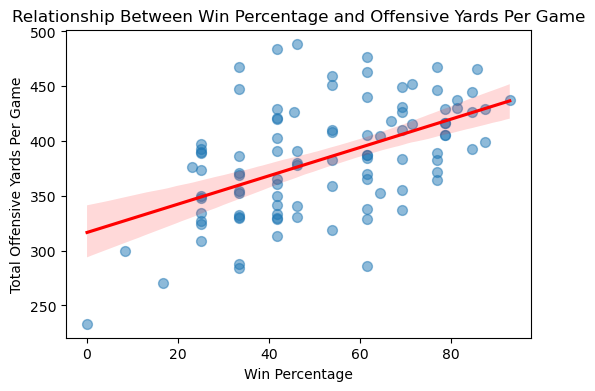

Trendline: Win % = 0.2108(Total Offensive YPG) + -28.58


In [116]:
# Offense YPG and Win % Scatter Plot
plt.figure(figsize=(6, 4))
sns.regplot(x='Win %', y='Total Offense YPG', data=football_df, scatter_kws={'s': 50, 'alpha': 0.5}, line_kws={'color': 'red'})

plt.xlabel('Win Percentage')
plt.ylabel('Total Offensive Yards Per Game')
plt.title('Relationship Between Win Percentage and Offensive Yards Per Game')

plt.show()

# Trendline
coefficients = np.polyfit(football_df['Total Offense YPG'], football_df['Win %'], deg=1)
slope = coefficients[0]
intercept = coefficients[1]
print(f'Trendline: Win % = {round(slope,4)}(Total Offensive YPG) + {round(intercept,2)}')

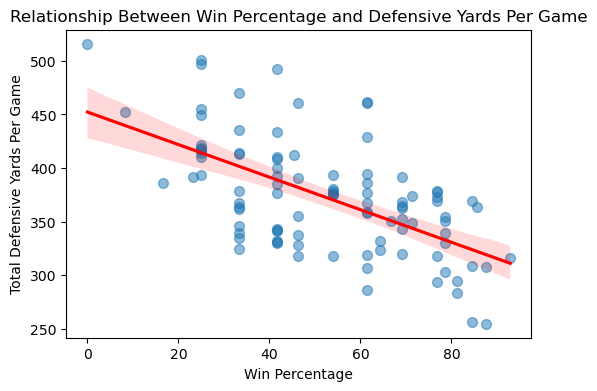

Trendline: Win % = -0.2379(Total Defense YPG) + 141.05


In [117]:
# Defense YPG and Win % Scatter Plot
plt.figure(figsize=(6, 4))
sns.regplot(x='Win %', y='Total Defense YPG', data=football_df, scatter_kws={'s': 50, 'alpha': 0.5}, line_kws={'color': 'red'})

plt.xlabel('Win Percentage')
plt.ylabel('Total Defensive Yards Per Game')
plt.title('Relationship Between Win Percentage and Defensive Yards Per Game')

plt.show()

# Trendline
coefficients = np.polyfit(football_df['Total Defense YPG'], football_df['Win %'], deg=1)
slope = coefficients[0]
intercept = coefficients[1]
print(f'Trendline: Win % = {round(slope,4)}(Total Defense YPG) + {round(intercept,2)}')

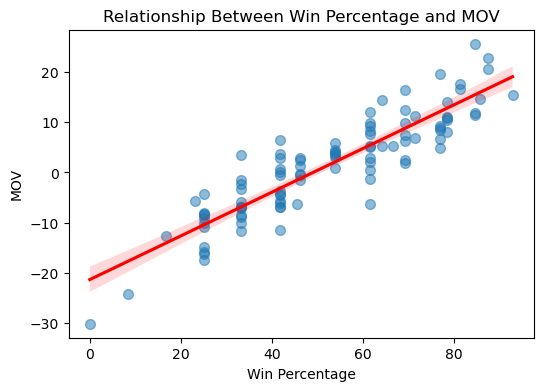

Trendline: Win % = 1.8479(MOV) + 49.72


In [160]:
# MOV and Win % Scatter Plot
plt.figure(figsize=(6, 4))
sns.regplot(x='Win %', y='MOV', data=football_df, scatter_kws={'s': 50, 'alpha': 0.5}, line_kws={'color': 'red'})

plt.xlabel('Win Percentage')
plt.ylabel('MOV')
plt.title('Relationship Between Win Percentage and MOV')

plt.show()

# Trendline
coefficients = np.polyfit(football_df['MOV'], football_df['Win %'], deg=1)
slope = coefficients[0]
intercept = coefficients[1]
print(f'Trendline: Win % = {round(slope,4)}(MOV) + {round(intercept,2)}')

---
# Machine Learning
- Linear Regression
- Linear Regression with train_test_split at 30/70

In [150]:
# Linear Regression
X = football_df[['Total Offense YPG', 'Total Defense YPG']]
y = football_df['Win %']
fit = LinearRegression().fit(X, y)
print("Intercept for final model:", fit.intercept_)
print('The score for this final model is:', fit.score(X,y))

Intercept for final model: 61.356776759617055
The score for this final model is: 0.5888709901783481


In [155]:
# Linear Regression with train_test_split
from sklearn.model_selection import train_test_split
lin_reg = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)
lin_reg.fit(X_train,y_train)
y_pred = lin_reg.predict(X_test)
lin_reg.score(X_test, y_test)

0.5191772091066122